In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("train.csv")

In [3]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df.isnull().sum()*100/len(df)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [8]:
#dropping Passenger IDs
df.drop(columns=['PassengerId'], inplace=True)

It shows that about 77% of data in cabin is missing and about 19.8% of Age data is missing.

Note: dropping cabrin is not an option because we will be losing lost of information from the datset, which could also be a problem when we want to train our model.

#### Creating the 'Has_Cabin' Feature and dropping 'Cabin'

In [9]:
df['Cabin'].value_counts()

Cabin
B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: count, Length: 147, dtype: int64

In [10]:
df['Has_Cabin'] = df['Cabin'].notna().astype('int64')

In [11]:
df.drop('Cabin', axis=1, inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        714 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   889 non-null    object 
 10  Has_Cabin  891 non-null    int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [13]:
df['Has_Cabin'].value_counts()

Has_Cabin
0    687
1    204
Name: count, dtype: int64

I created a binary feature from cabin called Has_Cabin just to show whether a passenger has a cabin or not.

Therefore, the missing values appear to be 0 (which indicate no cabin), and non-missing values as 1 (which indicate the present of Cabin)

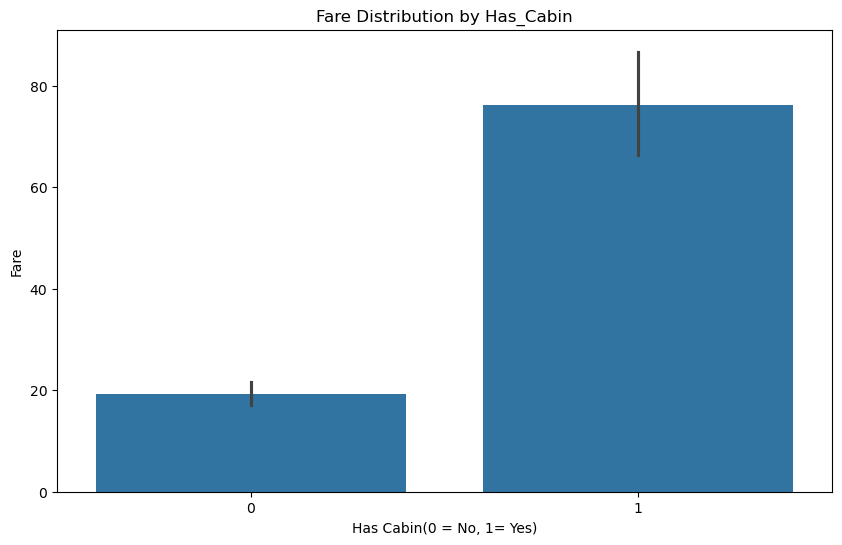

In [14]:
plt.figure(figsize=(10, 6))
sns.barplot(data =df, x='Has_Cabin', y='Fare')
#plt.figure(figsize=(10, 6))
plt.title('Fare Distribution by Has_Cabin')
plt.xlabel('Has Cabin(0 = No, 1= Yes)')
plt.ylabel('Fare')
plt.show()

the boxplot above shows a distribution that the passengers that has cabin paid a higher fare price than the passengers with no cabin 

#### Fixing missing values for Age using Median

In [15]:
df['Age'].mean()

29.69911764705882

In [16]:
df['Age'].median()

28.0

In [17]:
df['Age']= df['Age'].fillna(df['Age'].median())

Median was used here fo fill the missing values of Age because it isn't influenced by extreme values.

#### Mapping for Title

In [18]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand= False)

In [19]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [20]:
df['Title'].value_counts()

Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: count, dtype: int64

In [21]:
#df.isnull().sum()

In [22]:
#Checking for missing Titles
df['Title'].isna().sum()

0

In [23]:
# title mapping
title_mapping = {
    'Ms': 'Miss',
    'Mme': 'Miss',
    'Mlle': 'Miss',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Other',
    'Rev': 'Other',
    'Col': 'Other',
    'Major': 'Other',
    'Lady': 'Other',
    'Sir': 'Other',
    'Capt': 'Other',
    'Countess': 'Other',
    'Jonkheer': 'Other',
}

# Standardize and map titles
#df['Title'] = df['Title'].str.title()  # Ensure proper case
df['Title'] = df['Title'].map(title_mapping).fillna('Other')  # Map and handle unmapped titles


Note: Mapping was done here in order to reduce noise and to make the data more meaningful.

In [24]:
df['Title'].value_counts()

Title
Mr        517
Miss      186
Mrs       125
Master     40
Other      23
Name: count, dtype: int64

#### - Fixing Missing values for Embarked using Mode

In [25]:
#Checking for the mode of embarked
mode_embarked= df['Embarked'].mode()[0]
mode_embarked

'S'

In [26]:
#df['Embarked']= df['Embarked'].fillna(mode_embarked, inplace=True)
#using a dictionary with inplace=True
df.fillna({'Embarked': mode_embarked}, inplace=True)

Mode is used here because 'Embarked' is a categorical (object) column, and we cannot use the mean or median because they are used for numerical data only.

In [27]:
#checking to be sure that there are no more missing values
df['Embarked'].isnull().sum()

0

In [28]:
#Checking for the value count of embarked
df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [29]:
df.isnull().sum()

Survived     0
Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         0
Embarked     0
Has_Cabin    0
Title        0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Survived   891 non-null    int64  
 1   Pclass     891 non-null    int64  
 2   Name       891 non-null    object 
 3   Sex        891 non-null    object 
 4   Age        891 non-null    float64
 5   SibSp      891 non-null    int64  
 6   Parch      891 non-null    int64  
 7   Ticket     891 non-null    object 
 8   Fare       891 non-null    float64
 9   Embarked   891 non-null    object 
 10  Has_Cabin  891 non-null    int64  
 11  Title      891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [31]:
cats = ['Name', 'Sex', 'Ticket', 'Embarked', 'Title']
for i in cats:
    df[i] = df[i].astype('category')

cats

['Name', 'Sex', 'Ticket', 'Embarked', 'Title']

In [32]:
num = [i for i in df.columns if df[i].dtype in ['float64', 'int64']]
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']

In [33]:
#num = [i for i in df.columns if df[i].dtypes != 'object']
#cats = [i for i in df.columns if df[i].dtypes == 'object']

In [34]:
df['Age'].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [35]:
min_age= df['Age'].min()
max_age = df['Age'].max()
mini_age = df['Age'].nsmallest(5)
maxi_age = df['Age'].nlargest(5)

In [36]:
print(mini_age)
print(maxi_age)

803    0.42
755    0.67
469    0.75
644    0.75
78     0.83
Name: Age, dtype: float64
630    80.0
851    74.0
96     71.0
493    71.0
116    70.5
Name: Age, dtype: float64


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Survived   891 non-null    int64   
 1   Pclass     891 non-null    int64   
 2   Name       891 non-null    category
 3   Sex        891 non-null    category
 4   Age        891 non-null    float64 
 5   SibSp      891 non-null    int64   
 6   Parch      891 non-null    int64   
 7   Ticket     891 non-null    category
 8   Fare       891 non-null    float64 
 9   Embarked   891 non-null    category
 10  Has_Cabin  891 non-null    int64   
 11  Title      891 non-null    category
dtypes: category(5), float64(2), int64(5)
memory usage: 116.1 KB


### Categorical Univariate

### Univariate Analysis for some Categorical Column

In [38]:
s_cats = ['Sex', 'Embarked', 'Title']

In [39]:
filtered_cats= [col for col in cats if col not in ['Ticket','Name']]

In [40]:
filtered_cats

['Sex', 'Embarked', 'Title']

In [41]:
cats

['Name', 'Sex', 'Ticket', 'Embarked', 'Title']

In [42]:
for i in s_cats :
    print(f'Unique Values in {i}: {df[i].unique()}')
    print(f'Number of Unique values in {i}: {df[i].nunique()}')
    print('Value_Counts:')
    print(df[i].value_counts())
    print('*******************************************************')

Unique Values in Sex: ['male', 'female']
Categories (2, object): ['female', 'male']
Number of Unique values in Sex: 2
Value_Counts:
Sex
male      577
female    314
Name: count, dtype: int64
*******************************************************
Unique Values in Embarked: ['S', 'C', 'Q']
Categories (3, object): ['C', 'Q', 'S']
Number of Unique values in Embarked: 3
Value_Counts:
Embarked
S    646
C    168
Q     77
Name: count, dtype: int64
*******************************************************
Unique Values in Title: ['Mr', 'Mrs', 'Miss', 'Master', 'Other']
Categories (5, object): ['Master', 'Miss', 'Mr', 'Mrs', 'Other']
Number of Unique values in Title: 5
Value_Counts:
Title
Mr        517
Miss      186
Mrs       125
Master     40
Other      23
Name: count, dtype: int64
*******************************************************


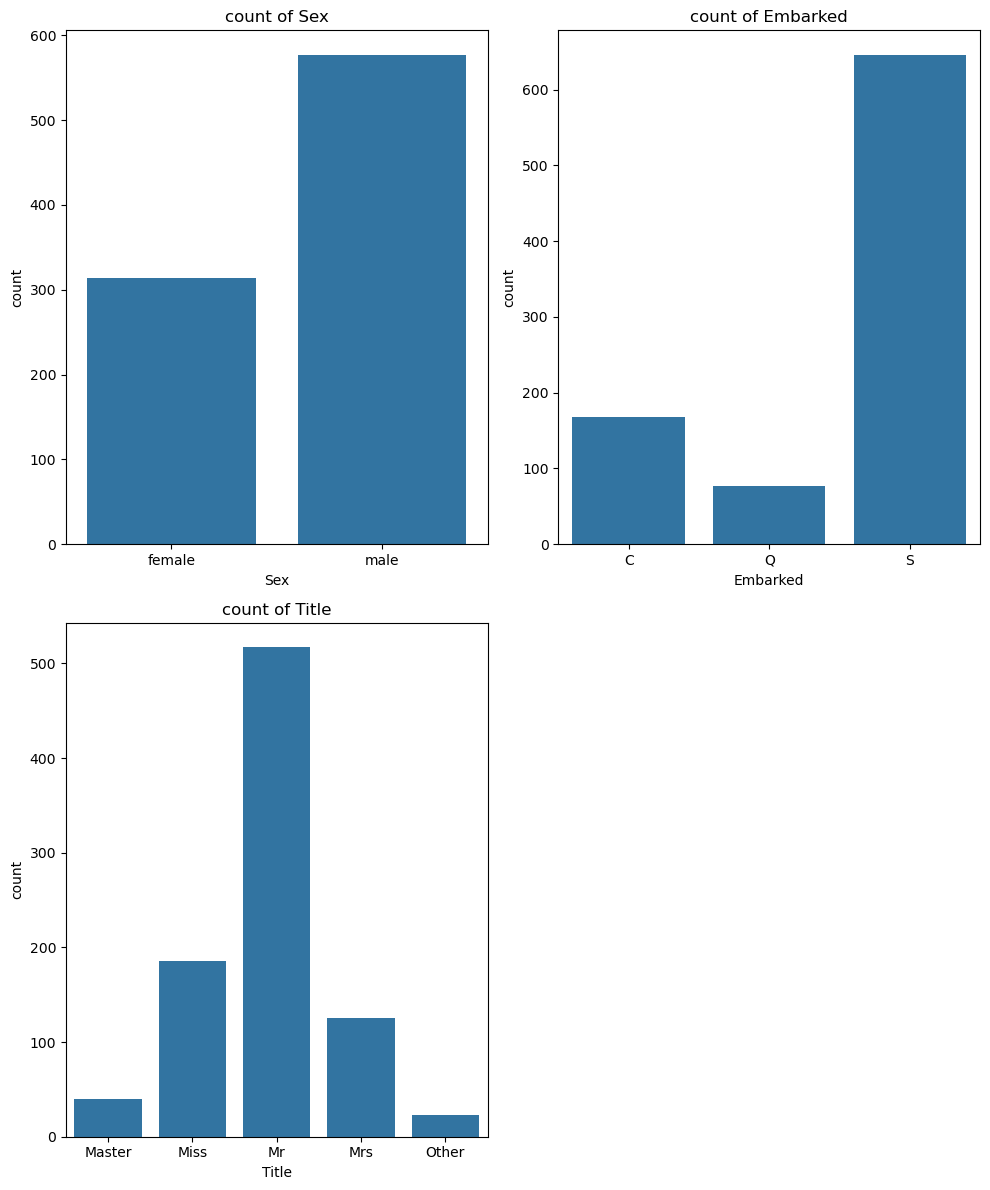

In [43]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 12))

axs=axs.flatten()

for i, col in enumerate(filtered_cats):
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'count of {col}')

#hide unused subplots
for j in range(len(filtered_cats), len(axs)):
    axs[j].axis('off')
plt.tight_layout()
plt.show()

### Univariate Analysis for numerical column

In [44]:
filtered_num = [col for col in num if col !='Fare']

In [45]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']

In [46]:
filtered_num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Has_Cabin']

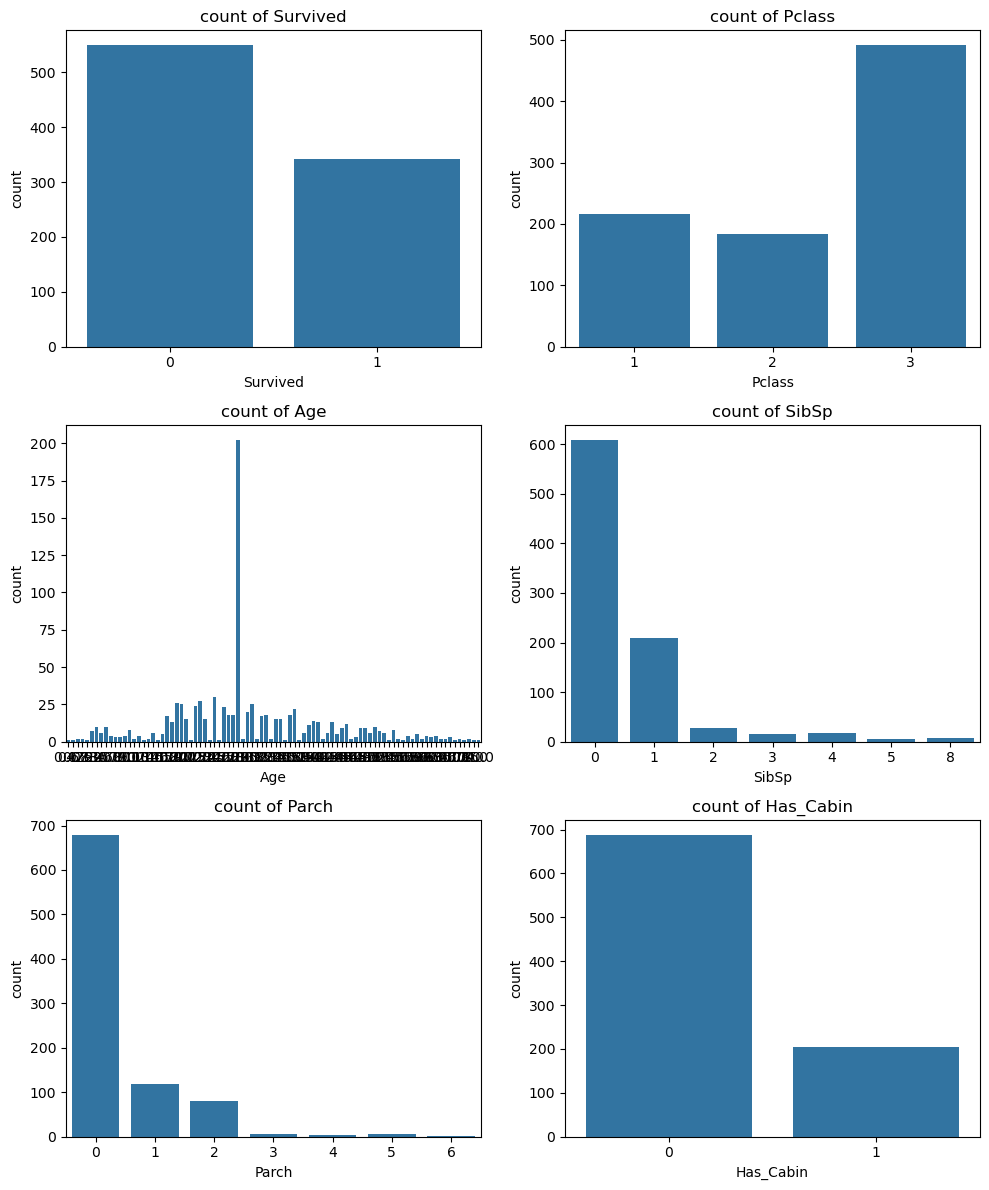

In [47]:
fig, axs= plt.subplots(nrows=3, ncols=2, figsize=(10,12))

axs= axs.flatten()

for i, col in enumerate(filtered_num):
    sns.countplot(data=df, x=col, ax=axs[i])
    axs[i].set_title(f'count of {col}')

for j in range(len(filtered_num), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### KDE for numerical values

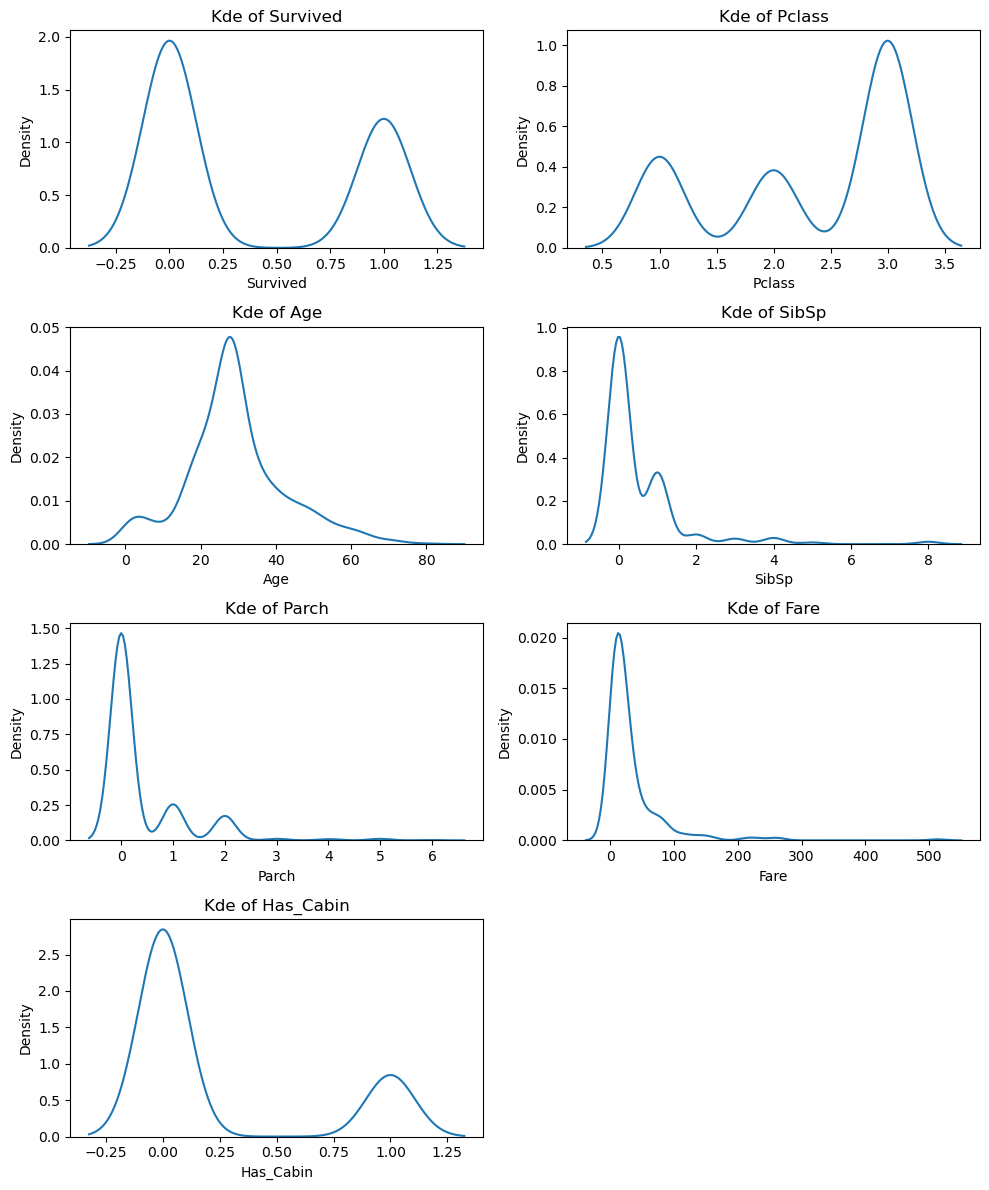

In [48]:
fig, axs= plt.subplots(nrows = 4, ncols= 2, figsize = (10, 12))

axs = axs.flatten()

for i, col in enumerate(num):
    sns.kdeplot(data = df, x= col, ax=axs[i])
    axs[i].set_title(f'Kde of {col}')

for j in range(len(num), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Distrubtion for numerical features

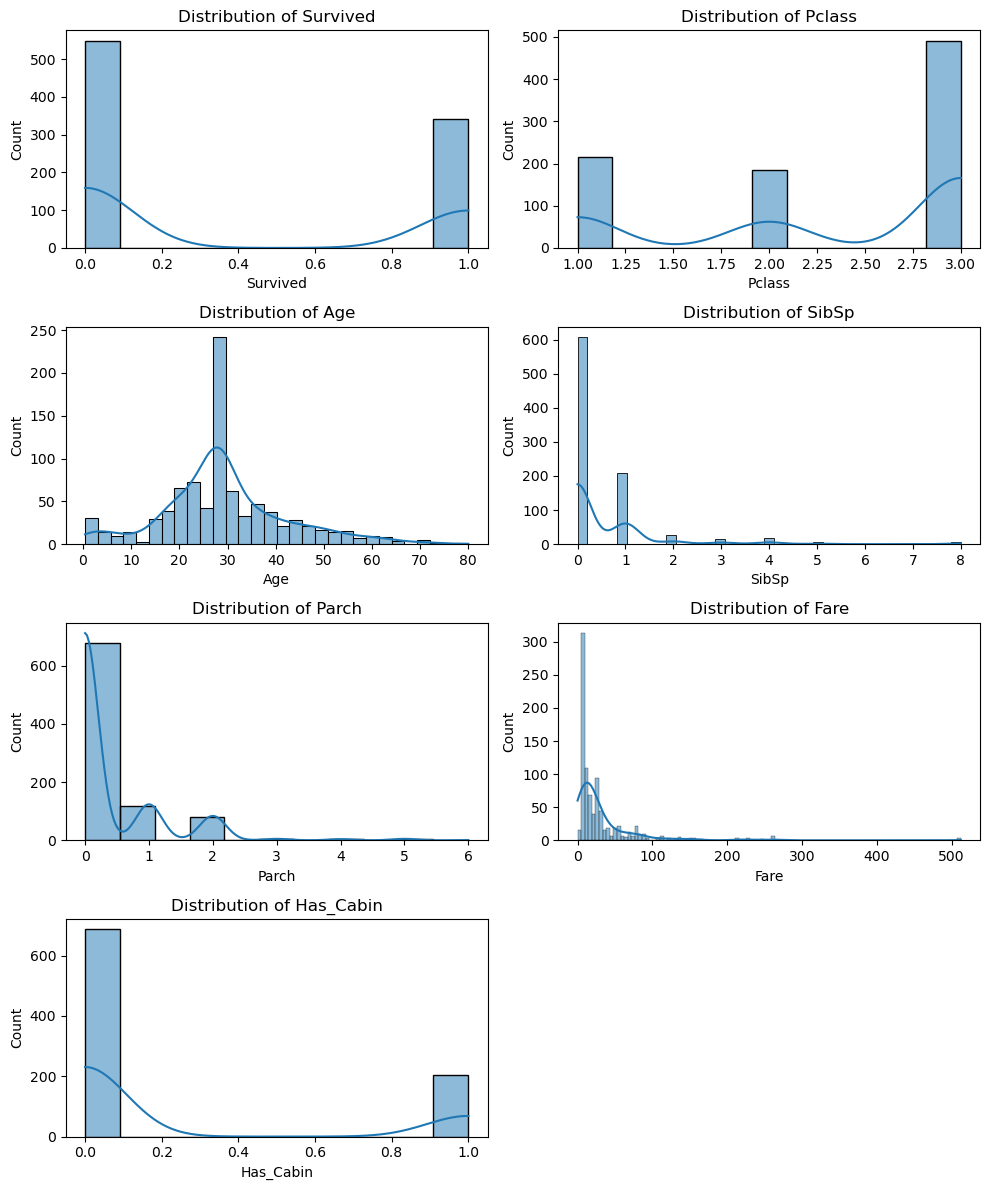

In [49]:
fig, axs= plt.subplots(nrows=4, ncols=2, figsize=(10,12))

axs= axs.flatten()

for i, col in enumerate(num):
    sns.histplot(data=df, x=col, kde=True, ax=axs[i])
    axs[i].set_title(f'Distribution of {col}')

for j in range(len(num), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Box-Plots of Numerical Features

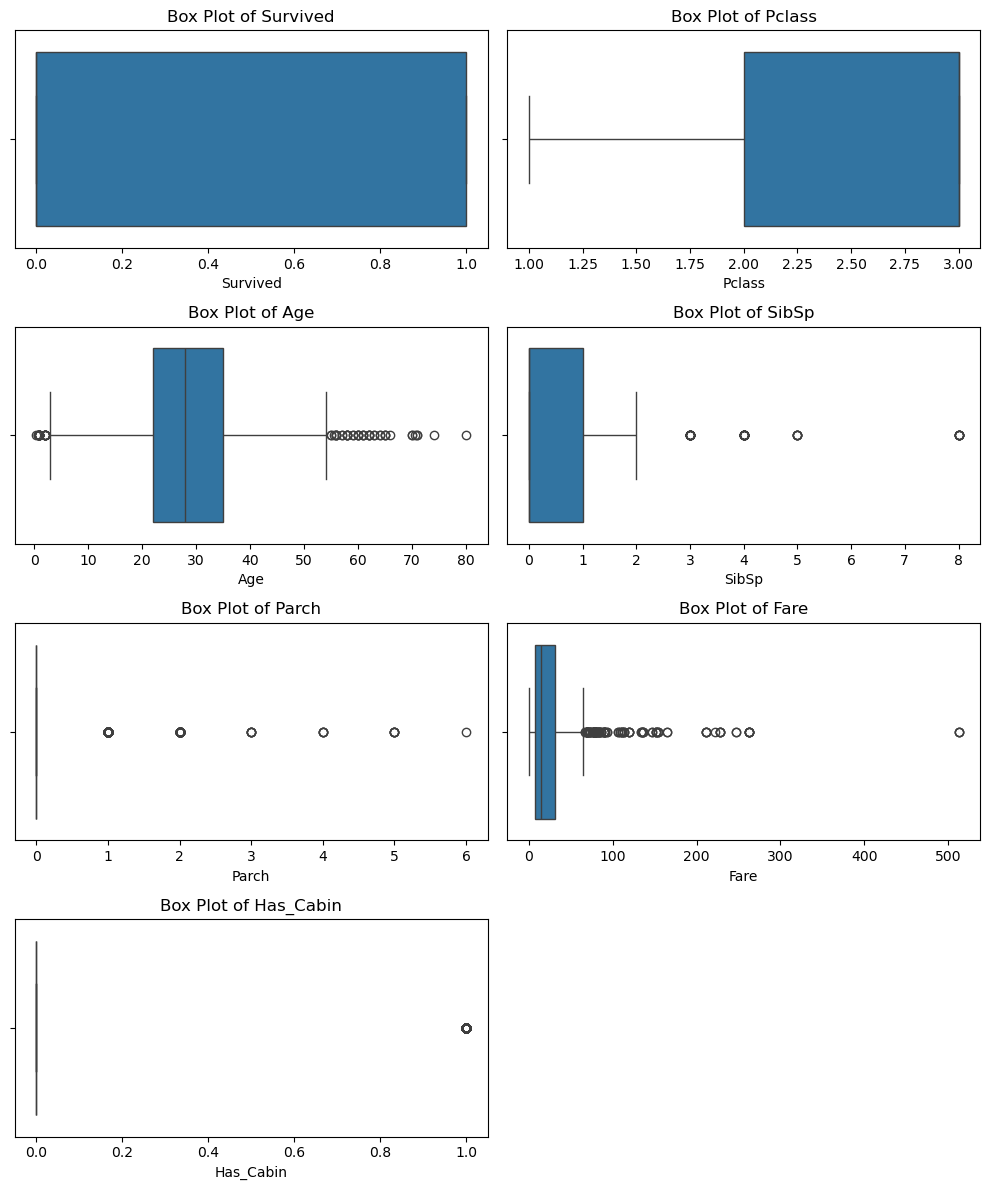

In [50]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize= (10, 12))

axs= axs.flatten()

for i, col in enumerate(num):
    sns.boxplot(data =df, x=col, ax=axs[i])
    axs[i].set_title(f'Box Plot of {col}')

for j in range(len(num), len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

In [51]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Has_Cabin
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208,0.228956
std,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429,0.420397
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


## Categorical Bi-Variate

#### Survival Count and Average Fare by Sex and Passenger Class

In [52]:
df_pivot = df.pivot_table(index='Sex', columns='Pclass', aggfunc={'Survived': 'sum', 'Fare': 'mean'}, observed=False)
print(df_pivot)

              Fare                       Survived        
Pclass           1          2          3        1   2   3
Sex                                                      
female  106.125798  21.970121  16.118810       91  70  72
male     67.226127  19.741782  12.661633       45  17  47


- From the Pivot table, you can see that women had higher survival rate across all class
- Also, first class had the highest survival rate
- also, first paid the highest fare, followed by second class and then  third class

#### Survival by Sex and Passenger Class

In [53]:
pd.crosstab(index=df['Sex'], columns=df['Pclass'], values=df['Survived'], aggfunc='sum', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,91,70,72,233
male,45,17,47,109
All,136,87,119,342


#### Survival Count by Sex and Class (Without Aggregation)

In [54]:
pd.crosstab(df['Sex'], df['Pclass'], margins=True)

Pclass,1,2,3,All
Sex,,,,
female,94,76,144,314
male,122,108,347,577
All,216,184,491,891


#### Survival Rate by Sex and Class (Normalized)

In [55]:
pd.crosstab(df['Sex'], df['Pclass'], values=df['Survived'], aggfunc='mean', margins=True)

Pclass,1,2,3,All
Sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


 #### Survival by Sex and Embarked Port

In [56]:
pd.crosstab(df['Sex'], df['Embarked'], values=df['Survived'], aggfunc='mean')

Embarked,C,Q,S
Sex,,,
female,0.876712,0.750000,0.692683
male,0.305263,0.073171,0.174603


#### Bar Plots of Categorical Features vs Survived

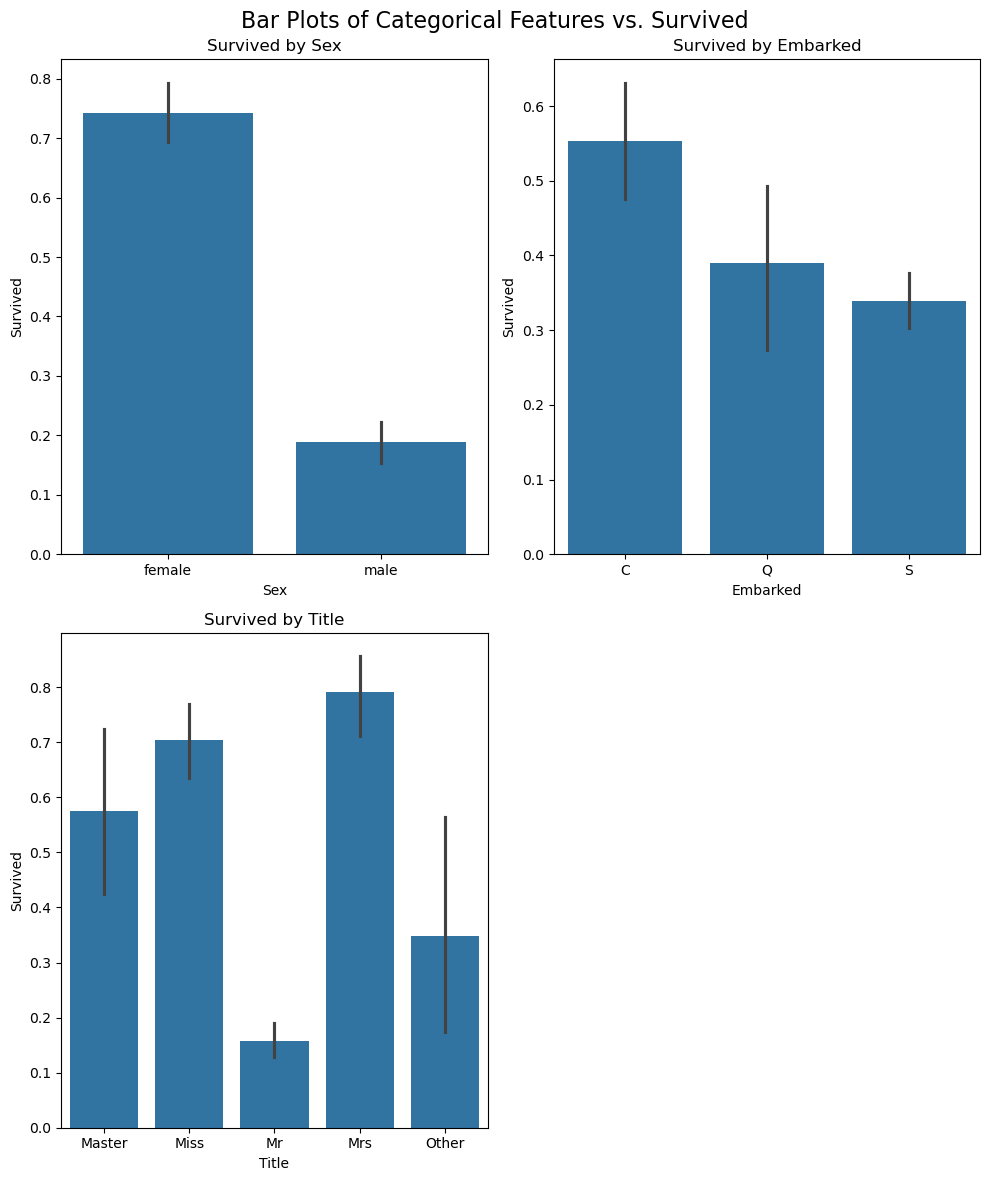

In [57]:
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10,12))

#flatten axs to make iteration easier
axs = axs.flatten()

#loop through Some_Cat and plot
for i, col in enumerate(filtered_cats):
    sns.barplot(data=df, x=col, y='Survived', ax=axs[i])
    axs[i].set_title(f'Survived by {col}')

#to hide any unused subplot
for j in range(len(filtered_cats), len(axs)):
    axs[j].axis('off')

plt.suptitle("Bar Plots of Categorical Features vs. Survived", fontsize=16)
    
plt.tight_layout()
plt.show()

#### Bar Plots of Categorical Features vs Age

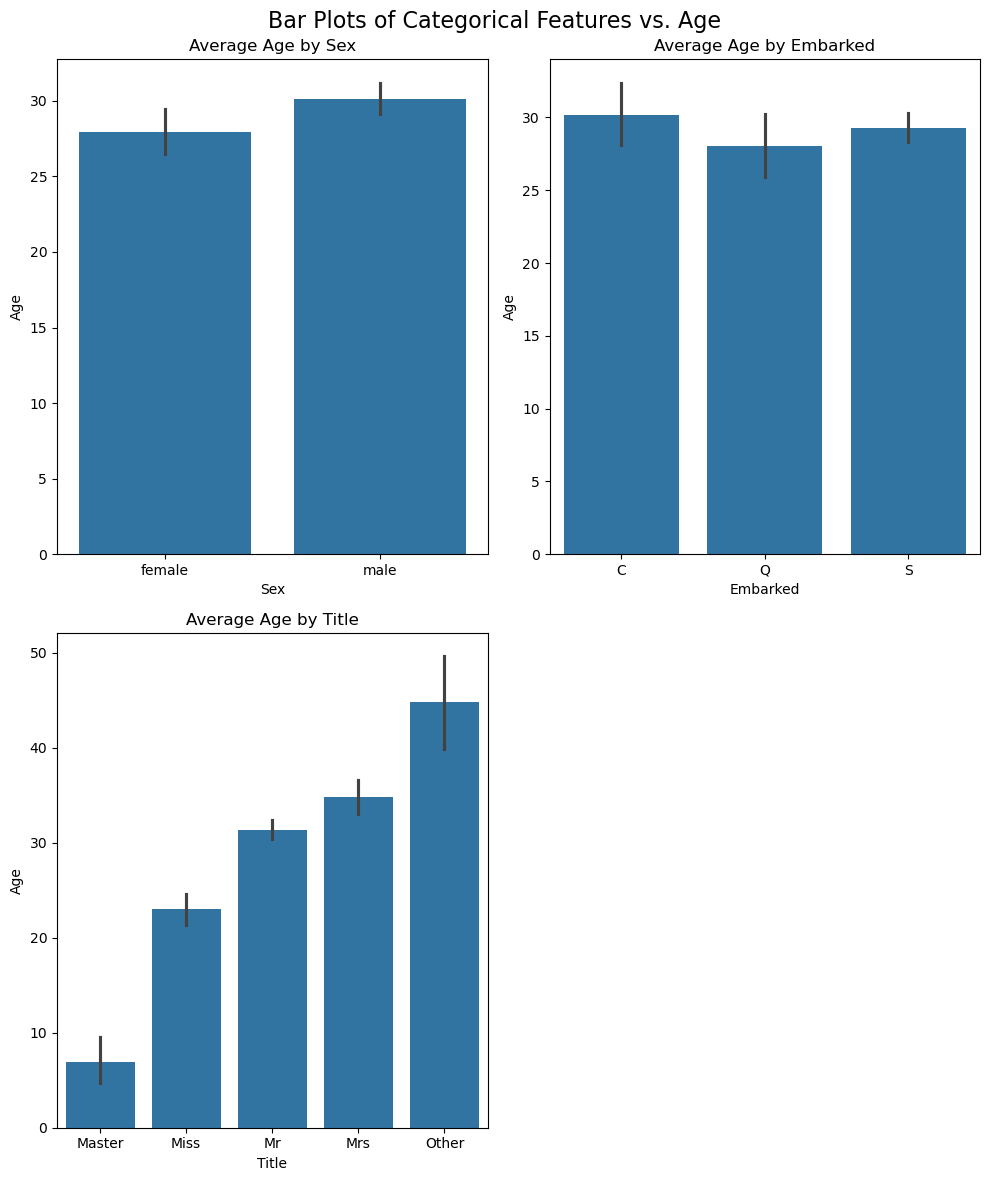

In [58]:
fig, axs= plt.subplots(nrows= 2, ncols= 2, figsize=(10,12))

#flatter axis
axs = axs.flatten()

#looping through s_cats(some_categoracal columns)
for i, col in enumerate(filtered_cats):
    sns.barplot(data =df, x=col, y='Age', ax=axs[i])
    axs[i].set_title(f'Average Age by {col}')

#hiding unused subplot
for j in range(len(filtered_cats), len(axs)):
    axs[j].axis('off')

plt.suptitle("Bar Plots of Categorical Features vs. Age", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.96]) 

plt.tight_layout()
plt.show()

#### Bar Plots of Categorical Features by Has_Cabin

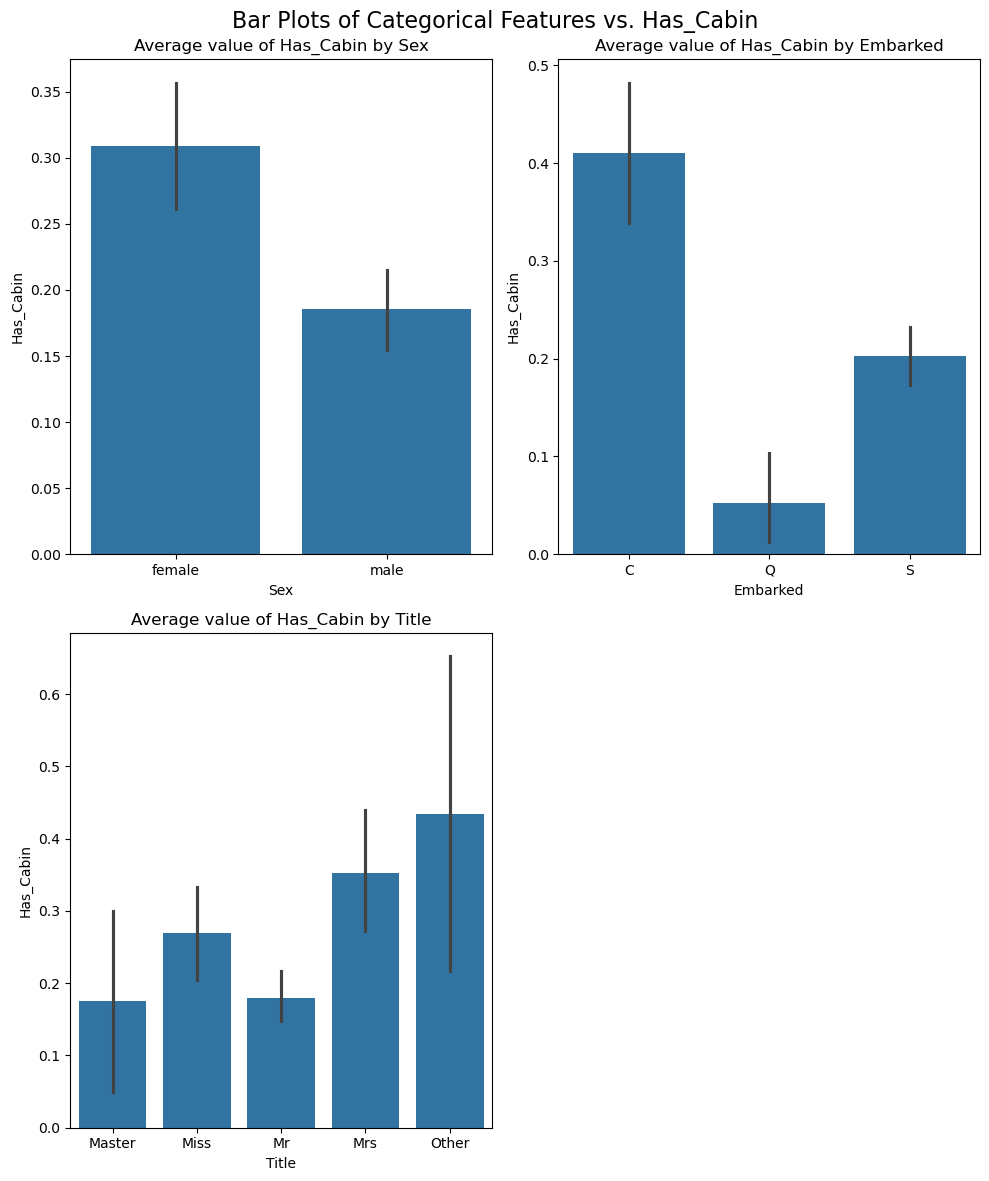

In [59]:
fig, axs= plt.subplots(nrows= 2, ncols= 2, figsize=(10,12))

#flatter axis
axs = axs.flatten()

#looping through s_cats(some_categoracal columns)
for i, col in enumerate(filtered_cats):
    sns.barplot(data =df, x=col, y='Has_Cabin', ax=axs[i])
    axs[i].set_title(f'Average value of Has_Cabin by {col}')

#hiding unused subplot
for j in range(len(filtered_cats), len(axs)):
    axs[j].axis('off')

plt.suptitle("Bar Plots of Categorical Features vs. Has_Cabin", fontsize=16)

plt.tight_layout()
plt.show()

#### Survival Rate by Embarkion Port

In [60]:
pd.crosstab(index=df['Embarked'], columns=df['Survived'], margins=True, normalize='index')

Survived,0,1
Embarked,,
C,0.446429,0.553571
Q,0.610390,0.389610
S,0.660991,0.339009
All,0.616162,0.383838


#### Histplot for Survival Rate by Embarkation Port

Text(0.5, 1.0, 'Survival Rate by Embarkation Port')

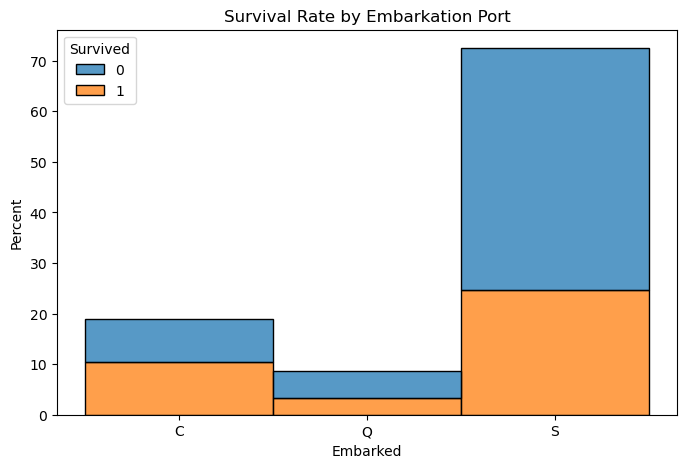

In [61]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x='Embarked', hue='Survived', multiple='stack', stat='percent', discrete=True)
plt.title('Survival Rate by Embarkation Port')

## Numerical Bi-Variate

#### Correlation between Numerical Features

In [62]:
df[['Fare', 'Age']].corr()

,Fare,Age
Fare,1.000000,0.096688
Age,0.096688,1.000000


#### Survival Rate By Fare

In [63]:
df.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

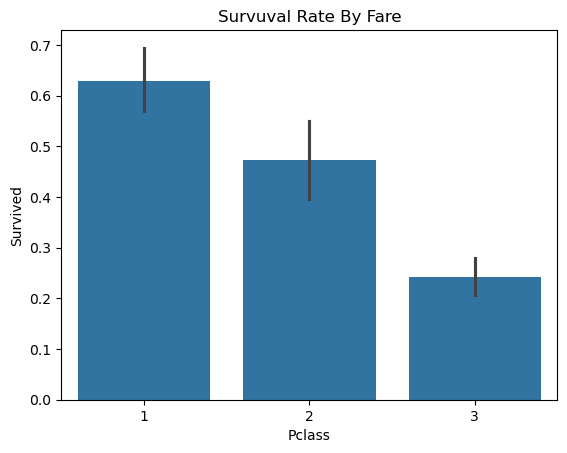

In [64]:
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title("Survuval Rate By Fare")
plt.show()

From the above, we can see that the Survival rate by passenger class shows that first-class had the highest survival rate of ~63%, followed by second class passengers at around ~47% and third had the lowest survival rate at about ~24%.

#### Bar Plot of Numerical features by Survival Rate

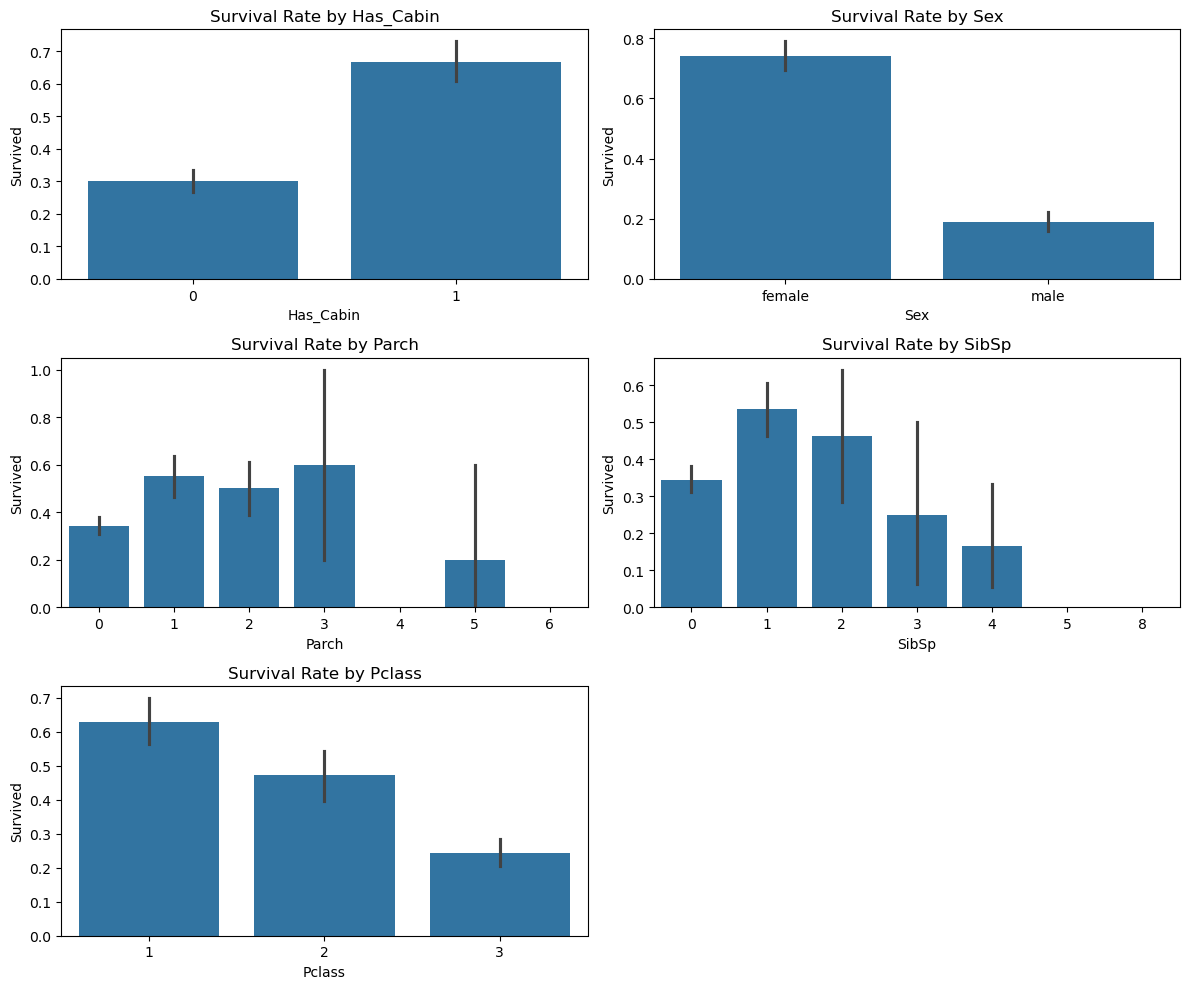

In [65]:
fig, axs= plt.subplots(nrows= 3, ncols= 2, figsize=(12,10))


axs= axs.flatten()
snum=['Has_Cabin','Sex','Parch', 'SibSp','Pclass']

for i, col in enumerate(snum):
    sns.barplot(data=df, x=col, y='Survived', ax=axs[i])
    axs[i].set_title(f'Survival Rate by {col}')

for j in range(len(snum),len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

#### Bar Plot of Numerical features by Fare

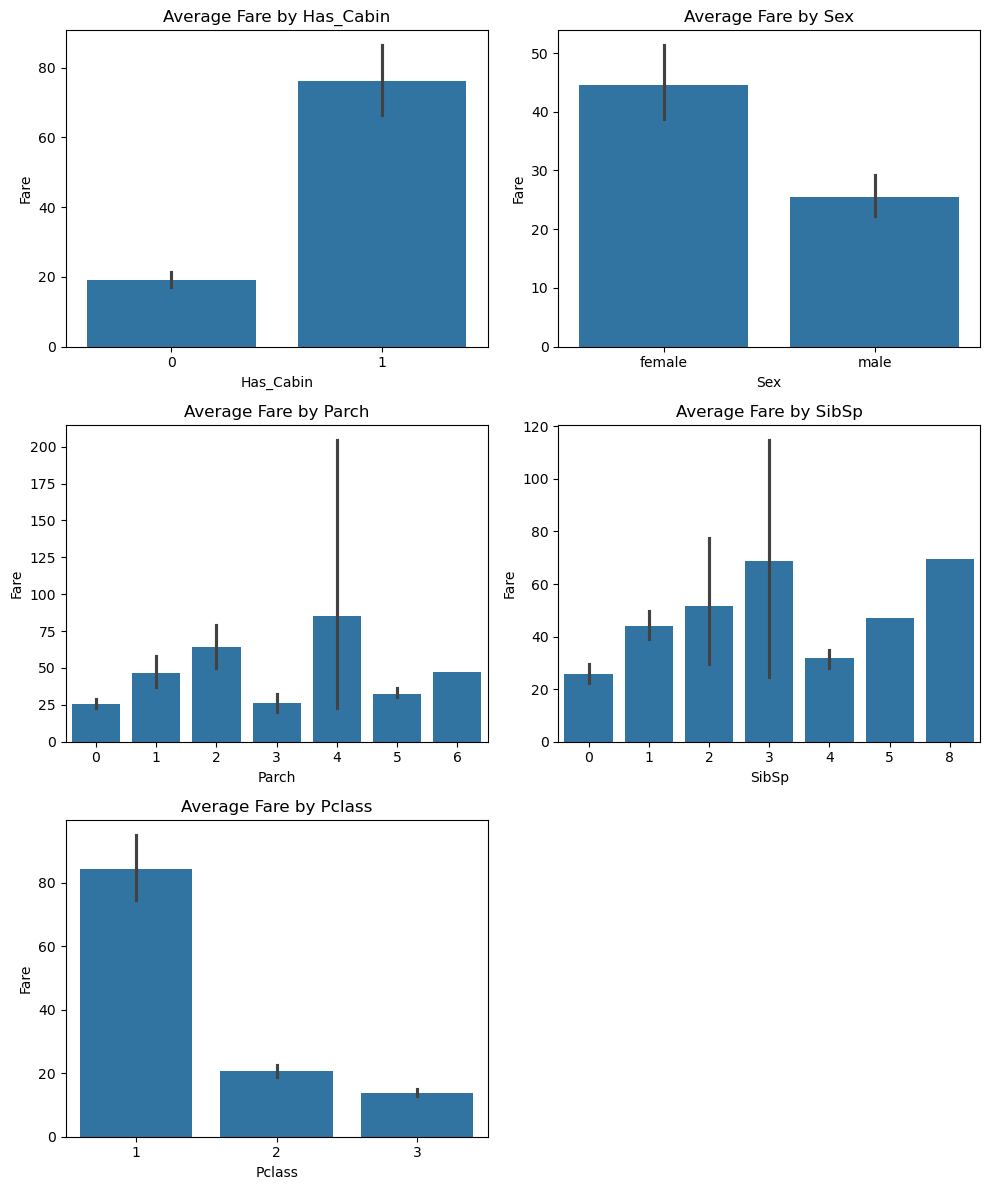

In [66]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(10, 12))

# Flatten axs to make iteration easier
axs = axs.flatten()

# Define the columns to plot
cols_to_plot = ['Has_Cabin', 'Sex', 'Parch', 'SibSp', 'Pclass']

# Loop through each column and plot
for i, col in enumerate(cols_to_plot):
    sns.barplot(data=df, x=col, y='Fare', ax=axs[i])
    axs[i].set_title(f'Average Fare by {col}')

for j in range(len(snum), len(axs)):
    axs[j].axis('off')

# Adjust layout
plt.tight_layout()
plt.show()


In [67]:
df['Fare'].nlargest(10)

258    512.3292
679    512.3292
737    512.3292
27     263.0000
88     263.0000
341    263.0000
438    263.0000
311    262.3750
742    262.3750
118    247.5208
Name: Fare, dtype: float64

### Multivariate Analysis

In [68]:
pd.crosstab(index=[df['Sex'], df['Pclass']], columns=df['Survived'], margins=True)

Survived         0    1  All
Sex    Pclass               
female 1         3   91   94
       2         6   70   76
       3        72   72  144
male   1        77   45  122
       2        91   17  108
       3       300   47  347
All            549  342  891

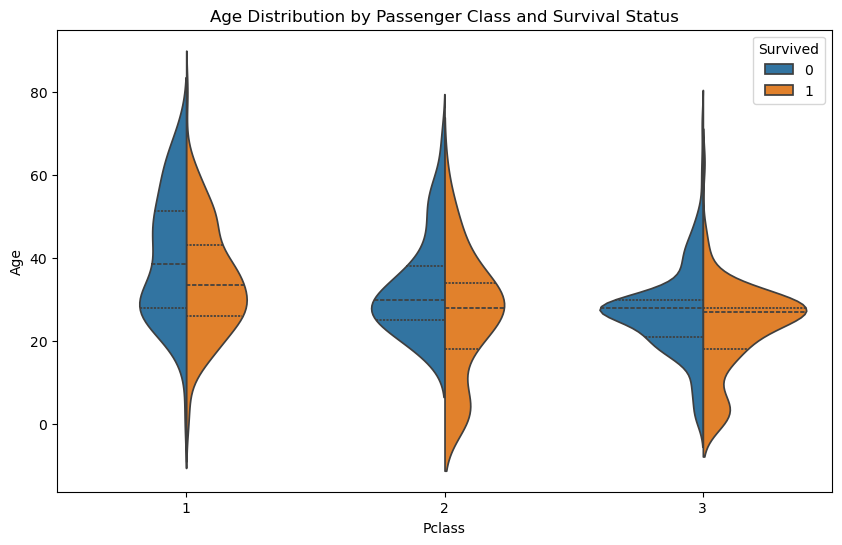

In [69]:
plt.figure(figsize=(10,6))
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, inner='quartile')
plt.title('Age Distribution by Passenger Class and Survival Status')
plt.show()

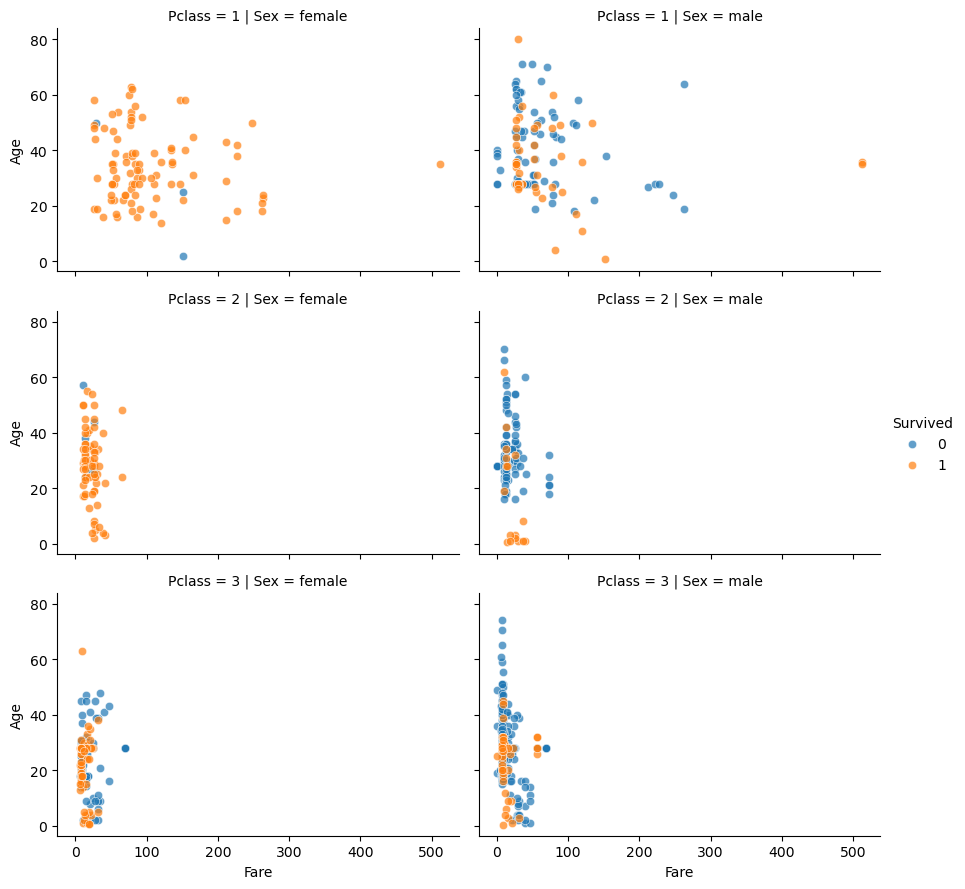

In [70]:
g = sns.FacetGrid(df, col='Sex', row='Pclass', hue='Survived', height=3, aspect=1.5)
g.map(sns.scatterplot, 'Fare', 'Age', alpha=0.7)
g.add_legend()
plt.show()

- From the scatterplot, we can see that females in first class had a higher survival rate than even males in first class. This is likely due to the 'Women and Children First' policy, which prioritized women and children for lifeboats over men during the evacuation.

- Across all three passenger classes, women had a higher survival rate than men. In fact, even women in third class had a better survival rate than men in first class.

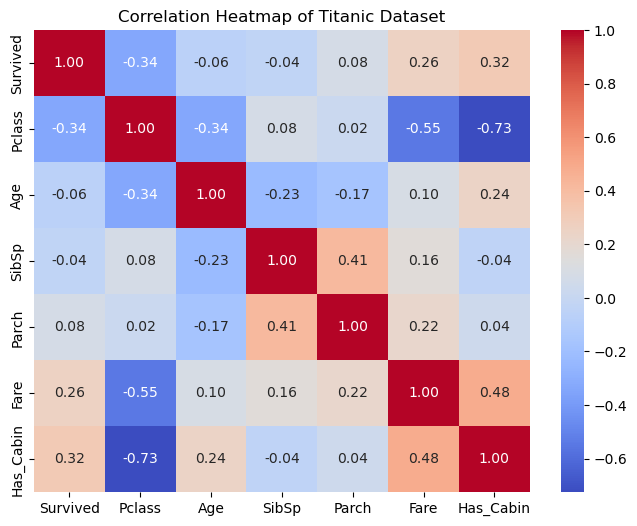

In [71]:
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Titanic Dataset")
plt.show()

In [72]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

Note: df.select_dtypes(include=['number']): selects only numeric columns.

#### Survival Rate by Embarkation and Passenger Class

In [73]:
pd.crosstab(index=[df["Embarked"], df["Pclass"]], columns=df["Survived"], margins=True, normalize="index")

Survived                0         1
Embarked Pclass                    
C        1       0.305882  0.694118
         2       0.470588  0.529412
         3       0.621212  0.378788
Q        1       0.500000  0.500000
         2       0.333333  0.666667
         3       0.625000  0.375000
S        1       0.410853  0.589147
         2       0.536585  0.463415
         3       0.810198  0.189802
All              0.616162  0.383838

#### Survival Count by Embarkation and Passenger Class

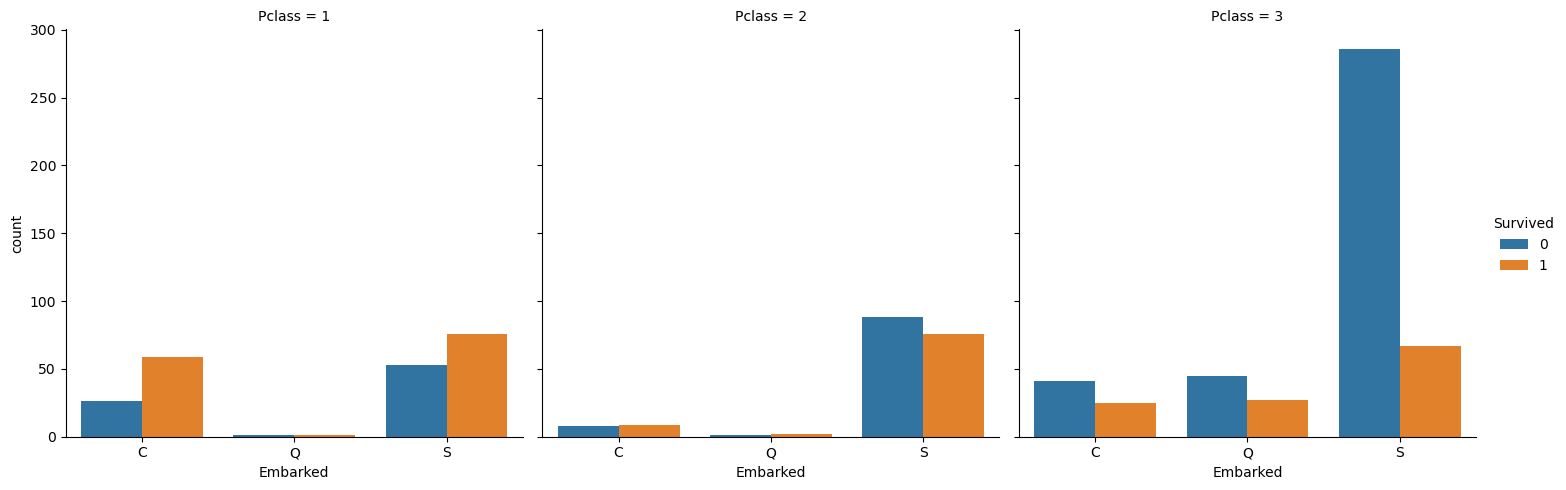

In [74]:
sns.catplot(data=df, x="Embarked", hue="Survived", col="Pclass", kind="count")

### feature Engineering

In [75]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

from the above code, we are trying to find the number of sibling/spouses or parents/children on the ship and group it as Familysize. it helps us to capture if people travling in large families were more likry to survive or not or were people alone more vulnerable or not

In [76]:
df['FamilySize'].value_counts()

FamilySize
1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: count, dtype: int64

In [77]:
#df.groupby('FamilySize')['Survived'].mean().sort_values(ascending= False)

In [78]:
df.groupby('FamilySize', as_index=False)['Survived'].mean().sort_values('Survived', ascending=False).reset_index(drop=True)

,FamilySize,Survived
0,4,0.724138
1,3,0.578431
2,2,0.552795
3,7,0.333333
4,1,0.303538
5,5,0.200000
6,6,0.136364
7,8,0.000000
8,11,0.000000


- Families of 8 had the highest survival rate (60%).
- Families of 14 had the lowest survival rate (0%).
- Families of 4 (55%) and 6 (50%) had a decent survival rate.
- Families of 2 (34%) and 12 (20%) had lower survival rates.
- Families of 10 and 14 had 0% survival, which means there were no survival in those family sizes.

#### Survival Rate by FamilySize and Embarkation Port(Embarked)

In [79]:
df.groupby(['FamilySize', 'Pclass', 'Embarked'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)

C:\Users\Aruys_Jr\AppData\Local\Temp\ipykernel_22968\3301503582.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(['FamilySize', 'Pclass', 'Embarked'], as_index=False)['Survived'].mean().sort_values(by='Survived', ascending=False)


,FamilySize,Pclass,Embarked,Survived
10,2,1,Q,1.0
50,6,2,S,1.0
41,5,2,S,1.0
36,5,1,C,1.0
33,4,3,C,1.0
...,...,...,...,...
75,11,2,C,NaN
76,11,2,Q,NaN
77,11,2,S,NaN
78,11,3,C,NaN


#### Survival Rate by FamilySize and Passenger Class(Pclass)

In [80]:
df.groupby(['FamilySize', 'Pclass'], as_index=False)['Survived'].mean().sort_values(by=['Survived', 'FamilySize'], ascending=[False, True]).reset_index(drop=True)

,FamilySize,Pclass,Survived
0,5,1,1.000000
1,5,2,1.000000
2,6,2,1.000000
3,4,2,0.769231
4,3,1,0.750000
5,2,1,0.728571
6,4,1,0.714286
7,3,2,0.677419
8,4,3,0.666667
9,1,1,0.532110


In [81]:
#df.groupby(['FamilySize', 'Embarked'], as_index=False)['Survived'].mean().sort_values(by =['Survived', 'FamilySize'], ascending= [False, True])\
#.reset_index(drop=True)

#### Survival Rate and Passenger Count by FamilySize and Embarkation port(Embarked)

In [82]:
df.groupby(['FamilySize', 'Embarked'], observed=True) \
  .agg(Survival_Rate=('Survived', 'mean'), Count=('Survived', 'count')) \
  .reset_index() \
  .sort_values(by=['Survival_Rate', 'FamilySize'], ascending=[False, True])

,FamilySize,Embarked,Survival_Rate,Count
11,5,C,1.000000,2
9,4,C,0.857143,7
10,4,S,0.681818,22
3,2,C,0.666667,51
6,3,C,0.608696,23
8,3,S,0.589041,73
4,2,Q,0.555556,9
5,2,S,0.495050,101
0,1,C,0.435294,85
1,1,Q,0.403509,57


#### Survival Rate and Passenger Count by FamilySize and Passenger Class(Pclass)

In [83]:
df.groupby(['FamilySize', 'Pclass'], as_index=False)\
.agg(Survival_Rate=('Survived', 'mean'), Count=('Survived', 'count'))\
.sort_values(by=['Survival_Rate', 'FamilySize'], ascending=[False, True])

,FamilySize,Pclass,Survival_Rate,Count
12,5,1,1.000000,2
13,5,2,1.000000,1
16,6,2,1.000000,1
10,4,2,0.769231,13
6,3,1,0.750000,24
3,2,1,0.728571,70
9,4,1,0.714286,7
7,3,2,0.677419,31
11,4,3,0.666667,9
0,1,1,0.532110,109


### Data Preprocossing

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    891 non-null    int64   
 1   Pclass      891 non-null    int64   
 2   Name        891 non-null    category
 3   Sex         891 non-null    category
 4   Age         891 non-null    float64 
 5   SibSp       891 non-null    int64   
 6   Parch       891 non-null    int64   
 7   Ticket      891 non-null    category
 8   Fare        891 non-null    float64 
 9   Embarked    891 non-null    category
 10  Has_Cabin   891 non-null    int64   
 11  Title       891 non-null    category
 12  FamilySize  891 non-null    int64   
dtypes: category(5), float64(2), int64(6)
memory usage: 123.1 KB


In [85]:
cats

['Name', 'Sex', 'Ticket', 'Embarked', 'Title']

#### Dropping 'Name' and 'Ticket'

In [86]:
cats= [col for col in cats if col not in['Name', 'Ticket']] 

In [87]:
df = df.drop(['Name', 'Ticket'], axis=1)

- Reason for dropping 'Name' column before performing one-hot encoding is that the name column itself isn't useful for modelling and besides we have already extracted the important feature (Title) from it.

- Reason for dropping Ticket is that its too random and unstructured. Note: Ticket numbers don't follow a clear pattern and they are not useful for predicting modeling.

In [88]:
cats

['Sex', 'Embarked', 'Title']

- Dropping 'Name' and 'Ticket' before performing one-hot encoding which is show in the code above. 

- Note: From the code below which i will be commenting, i will be performing one-hot encoding in the same line while dropping the the columns we want to drop.

In [89]:
#new_df = pd.get_dummies(df.drop(columns = ['Name, Ticket']), drop_first=True)

In [90]:
new_df = pd.get_dummies(df[cats], drop_first=True)

In [91]:
new_df

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,True,False,True,False,True,False,False
1,False,False,False,False,False,True,False
2,False,False,True,True,False,False,False
3,False,False,True,False,False,True,False
4,True,False,True,False,True,False,False
...,...,...,...,...,...,...,...
886,True,False,True,False,False,False,True
887,False,False,True,True,False,False,False
888,False,False,True,True,False,False,False
889,True,False,False,False,True,False,False


In [92]:
# 1. Drop the original categorical columns
df = df.drop(cats, axis=1)

In [93]:
df = pd.concat([df, new_df], axis=1)

pd.concat is concantenating or combining two dataFrames(df and new_df)/one-hot encoded columns

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Has_Cabin    891 non-null    int64  
 7   FamilySize   891 non-null    int64  
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Other  891 non-null    bool   
dtypes: bool(7), float64(2), int64(6)
memory usage: 61.9 KB


In [95]:
df.isnull().sum()

Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Has_Cabin      0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Other    0
dtype: int64

In [96]:
X = df.drop('Survived', axis=1) # features
y = df['Survived'] # Target

- from the above, we seperated the features(input) by removing the 'Survived' column and assign the target variable(output) to y, which is what we will be predicting

- Note: We separated the features (inputs) by removing the 'Survived' column because, initially, 'Survived' was part of the dataset, and the goal is to predict it. Now, we want to use the remaining features (X) to predict the target variable (y) in future predictions.

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Survived     891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Age          891 non-null    float64
 3   SibSp        891 non-null    int64  
 4   Parch        891 non-null    int64  
 5   Fare         891 non-null    float64
 6   Has_Cabin    891 non-null    int64  
 7   FamilySize   891 non-null    int64  
 8   Sex_male     891 non-null    bool   
 9   Embarked_Q   891 non-null    bool   
 10  Embarked_S   891 non-null    bool   
 11  Title_Miss   891 non-null    bool   
 12  Title_Mr     891 non-null    bool   
 13  Title_Mrs    891 non-null    bool   
 14  Title_Other  891 non-null    bool   
dtypes: bool(7), float64(2), int64(6)
memory usage: 61.9 KB


In [98]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

random_state= 50

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= random_state, test_size=0.2, stratify=y)

#### Training the Model

##### Using Random FOrest Classifier

In [99]:
from sklearn.ensemble import RandomForestClassifier 
rf = RandomForestClassifier(random_state = random_state, n_estimators=100, max_depth = 6)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, random_state=50)

In [100]:
rf_pred = rf.predict(X_test)

In [101]:
accuracy = accuracy_score(y_test, rf_pred)
print(f" Randon Forest Accuracy: {accuracy:.4f}")

 Randon Forest Accuracy: 0.8547


In [102]:
from sklearn.metrics import classification_report
rf_report = classification_report(y_test, rf_pred)
print(rf_report)

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       110
           1       0.89      0.71      0.79        69

    accuracy                           0.85       179
   macro avg       0.86      0.83      0.84       179
weighted avg       0.86      0.85      0.85       179



In [103]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, rf_pred)
print(cm)

[[104   6]
 [ 20  49]]


##### Explanation of the Confusion Matrix above
True Negatives (TN): 104 → Correctly predicted as not survived.

False Positives (FP): 6 → Incorrectly predicted as survived, but didn’t.

False Negatives (FN): 20 → Incorrectly predicted as not survived, but did.

True Positives (TP): 49 → Correctly predicted as survived.

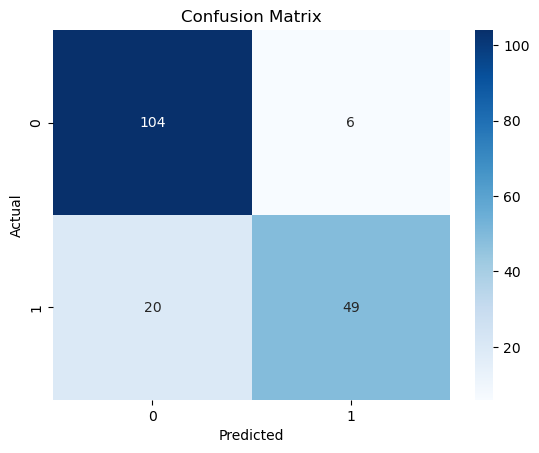

In [104]:
sns.heatmap(cm, annot = True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [105]:
pd.crosstab(y_test, rf_pred)

col_0,0,1
Survived,,
0,104,6
1,20,49


#### Evaluating Random Forest Performance Using ROC Curve and AUC

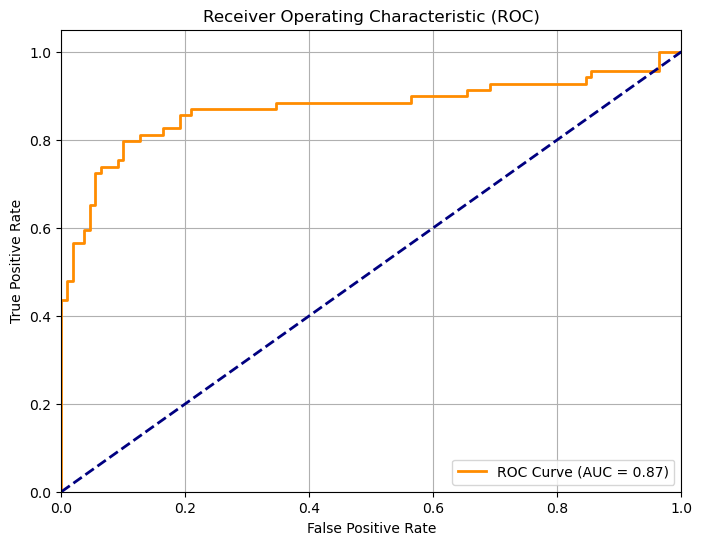

In [106]:
from sklearn.metrics import roc_curve, auc
# Get predicted probabilities for the positive class
y_prob = rf.predict_proba(X_test)[:, 1]

# Calculate FPR, TPR
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot the ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.grid()
plt.show()

An AUC score of 87% shows that the Random Forest model can correctly rank a random survivor above a random non-survivor.

In [107]:
rf_final = RandomForestClassifier(random_state=random_state, n_estimators=100, max_depth=6)
rf_final.fit(X, y)

RandomForestClassifier(max_depth=6, random_state=50)

In [108]:
test_df= pd.read_csv("test.csv")

In [109]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [110]:
#dropping Passenger IDs
test_df.drop(columns=['PassengerId'], inplace=True)

In [111]:
test_df["Cabin"].value_counts()

Cabin
B57 B59 B63 B66    3
B45                2
C89                2
C55 C57            2
A34                2
                  ..
E52                1
D30                1
E31                1
C62 C64            1
C105               1
Name: count, Length: 76, dtype: int64

In [112]:
test_df["Has_Cabin"] = test_df["Cabin"].notna().astype("int64")

In [113]:
test_df.drop("Cabin", axis=1, inplace=True)

#### Fixing Missing Values for Age using Median

In [114]:
test_df["Age"].median()

27.0

In [115]:
test_df["Age"] = test_df["Age"].fillna(df["Age"].median())

In [116]:
test_df.isnull().sum()

Pclass       0
Name         0
Sex          0
Age          0
SibSp        0
Parch        0
Ticket       0
Fare         1
Embarked     0
Has_Cabin    0
dtype: int64

#### Handling Missing Values for Fare

In [117]:
test_df["Fare"].median()

14.4542

In [118]:
test_df["Fare"] = test_df["Fare"].fillna(test_df["Fare"].median())

In [119]:
test_df["Fare"].isnull().sum()

0

#### Mapping the title

In [120]:
test_df["Title"] = test_df["Name"]. str.extract(r'([A-Za-z]+)\.', expand = False)

In [121]:
test_df["Title"].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Dona'],
      dtype=object)

In [122]:
title_mapping = {
    'Ms': 'Miss',
    'Mr': 'Mr',
    'Mrs': 'Mrs',
    'Miss': 'Miss',
    'Master': 'Master',
    'Dr': 'Other',
    'Rev': 'Other',
    'Col': 'Other',
    'Dona': 'Other',
}

test_df['Title'] = test_df['Title'].map(title_mapping).fillna('Other')

In [123]:
test_df["Title"].value_counts()

Title
Mr        240
Miss       79
Mrs        72
Master     21
Other       6
Name: count, dtype: int64

In [124]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Pclass     418 non-null    int64  
 1   Name       418 non-null    object 
 2   Sex        418 non-null    object 
 3   Age        418 non-null    float64
 4   SibSp      418 non-null    int64  
 5   Parch      418 non-null    int64  
 6   Ticket     418 non-null    object 
 7   Fare       418 non-null    float64
 8   Embarked   418 non-null    object 
 9   Has_Cabin  418 non-null    int64  
 10  Title      418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [125]:
cat = ["Name", "Sex", "Ticket", "Embarked", "Title"]
for i in cats:
    test_df[i] = test_df[i].astype("category")

cat

['Name', 'Sex', 'Ticket', 'Embarked', 'Title']

In [126]:
nums = [i for i in test_df.columns if test_df[i].dtype in ["float64", "int64"]]

nums

['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Has_Cabin']

#### Feature Engineering

In [127]:
test_df["FamilySize"] = test_df["SibSp"] + test_df["Parch"] + 1

In [128]:
test_df["FamilySize"].value_counts()

FamilySize
1     253
2      74
3      57
4      14
5       7
7       4
11      4
6       3
8       2
Name: count, dtype: int64

In [129]:
test_df["FamilySize"]. value_counts().sum()

418

In [130]:
cat = [col for col in cat if col not in ["Name", "Ticket"]]

In [131]:
test_df.drop(["Name", "Ticket"], axis = 1, inplace = True)

In [132]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Pclass      418 non-null    int64   
 1   Sex         418 non-null    category
 2   Age         418 non-null    float64 
 3   SibSp       418 non-null    int64   
 4   Parch       418 non-null    int64   
 5   Fare        418 non-null    float64 
 6   Embarked    418 non-null    category
 7   Has_Cabin   418 non-null    int64   
 8   Title       418 non-null    category
 9   FamilySize  418 non-null    int64   
dtypes: category(3), float64(2), int64(5)
memory usage: 24.7 KB


In [133]:
cat

['Sex', 'Embarked', 'Title']

In [134]:
new_test_df = pd.get_dummies(test_df[cat], drop_first=True)

In [135]:
new_test_df

,Sex_male,Embarked_Q,Embarked_S,Title_Miss,Title_Mr,Title_Mrs,Title_Other
0,True,True,False,False,True,False,False
1,False,False,True,False,False,True,False
2,True,True,False,False,True,False,False
3,True,False,True,False,True,False,False
4,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...
413,True,False,True,False,True,False,False
414,False,False,False,False,False,False,True
415,True,False,True,False,True,False,False
416,True,False,True,False,True,False,False


Note: I applied one-hot encoding to the categorical columns listed in "cat" to avoid dummy variable(muilticollinearity).

In [136]:
test_df = test_df.drop(cat, axis = 1)

Now, I had to remove the orginal categorical columns from the "test dataset" since they have now been converted to numerical dummy variables

In [137]:
test_df = pd.concat([test_df, new_test_df], axis = 1)

now, I'm adding the dummy variables back into the test dataset inorder to complete the encoding process.

In [138]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pclass       418 non-null    int64  
 1   Age          418 non-null    float64
 2   SibSp        418 non-null    int64  
 3   Parch        418 non-null    int64  
 4   Fare         418 non-null    float64
 5   Has_Cabin    418 non-null    int64  
 6   FamilySize   418 non-null    int64  
 7   Sex_male     418 non-null    bool   
 8   Embarked_Q   418 non-null    bool   
 9   Embarked_S   418 non-null    bool   
 10  Title_Miss   418 non-null    bool   
 11  Title_Mr     418 non-null    bool   
 12  Title_Mrs    418 non-null    bool   
 13  Title_Other  418 non-null    bool   
dtypes: bool(7), float64(2), int64(5)
memory usage: 25.8 KB


In [139]:
test_df.isnull().sum()

Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Has_Cabin      0
FamilySize     0
Sex_male       0
Embarked_Q     0
Embarked_S     0
Title_Miss     0
Title_Mr       0
Title_Mrs      0
Title_Other    0
dtype: int64

In [140]:
# Align test_df to have same columns and order as X_train
test_df = test_df[X_train.columns]

In [141]:
predictions = rf_final.predict(test_df)

Now, i'm using my trained model(Random Forest model) to make a prediction on the test datatset(test_df)

In [142]:
predictions

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,

In [143]:
original_test_df = pd.read_csv('test.csv')

In [144]:
submission = pd.DataFrame({
    'PassengerId': original_test_df['PassengerId'],
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

what was done here is that, after making those predictions on who survived using my RF model, then I paired those prediction with the passenger IDs from the original test file, and saved everything in a CSV file for kaggle submission.

In [145]:
import os
os.getcwd()

'C:\\Users\\Aruys_Jr\\Desktop\\Data Titanic training\\Titanic_Survival_Prediction'